<a href="https://colab.research.google.com/github/Imirushik/Bank-Marketing-ML/blob/main/Code/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and previewing

In [22]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'  # Update with your file path in Colab
data = pd.read_csv(file_path, sep=';')  # Use `sep=';'` since the dataset uses semicolons
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Analyzing

In [23]:
# Basic statistics and info
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values
print(data['y'].value_counts())  # Check target class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

# **Preprocessing**

**Encoding Catogerical Values**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
print("Encoding categorical features:")
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  # Exclude the target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
        print(f"- Column '{column}' encoded with classes: {le.classes_}")

# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("\nTarget variable 'y' encoded as:")
print(" - 'yes' -> 1")
print(" - 'no'  -> 0")


Encoding categorical features:
- Column 'job' encoded with classes: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
- Column 'marital' encoded with classes: ['divorced' 'married' 'single']
- Column 'education' encoded with classes: ['primary' 'secondary' 'tertiary' 'unknown']
- Column 'default' encoded with classes: ['no' 'yes']
- Column 'housing' encoded with classes: ['no' 'yes']
- Column 'loan' encoded with classes: ['no' 'yes']
- Column 'contact' encoded with classes: ['cellular' 'telephone' 'unknown']
- Column 'month' encoded with classes: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
- Column 'poutcome' encoded with classes: ['failure' 'other' 'success' 'unknown']

Target variable 'y' encoded as:
 - 'yes' -> 1
 - 'no'  -> 0


**Split in to train & test**

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset sizes
print("Dataset split summary:")
print(f"- Total samples: {len(data)}")
print(f"- Training samples: {len(X_train)}")
print(f"- Test samples: {len(X_test)}")

# Verify stratification
print("\nClass distribution in the original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in the test set:")
print(y_test.value_counts(normalize=True))


Dataset split summary:
- Total samples: 45211
- Training samples: 36168
- Test samples: 9043

Class distribution in the original dataset:
y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

Class distribution in the training set:
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Class distribution in the test set:
y
0    0.883003
1    0.116997
Name: proportion, dtype: float64


**Balancing (Using SMOTE)**

In [26]:
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train.value_counts())

# Verify the dataset sizes after SMOTE
print("\nDataset size after SMOTE:")
print(f"- Number of samples in X_train: {len(X_train)}")
print(f"- Number of samples in y_train: {len(y_train)}")


Class distribution before SMOTE:
y
0    31937
1     4231
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class distribution after SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64

Dataset size after SMOTE:
- Number of samples in X_train: 63874
- Number of samples in y_train: 63874


**Outliers handling and scaling**

Visualizing outliers with box plots:


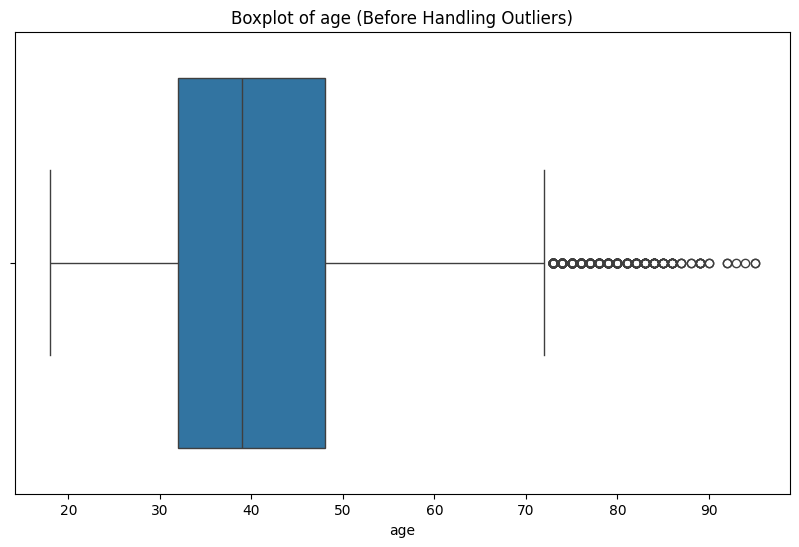

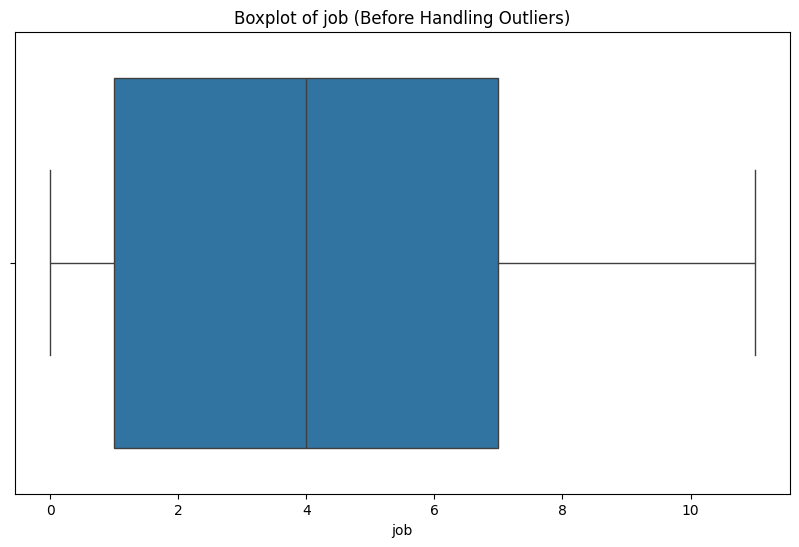

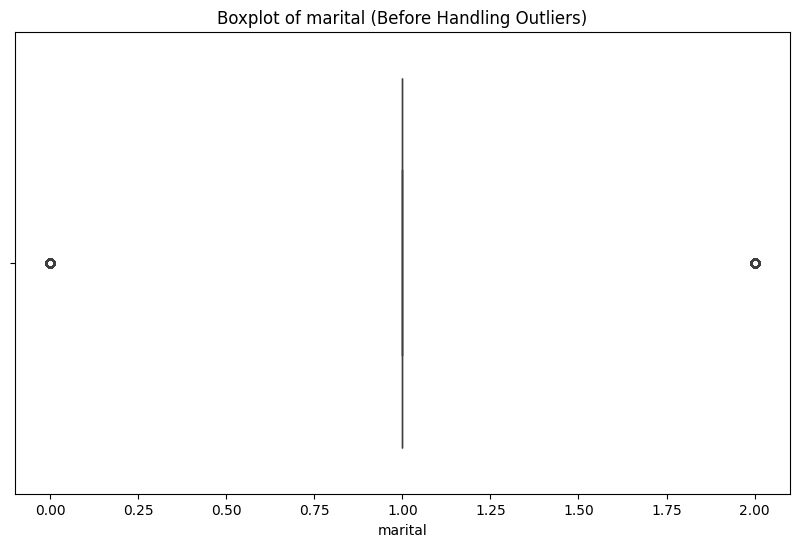

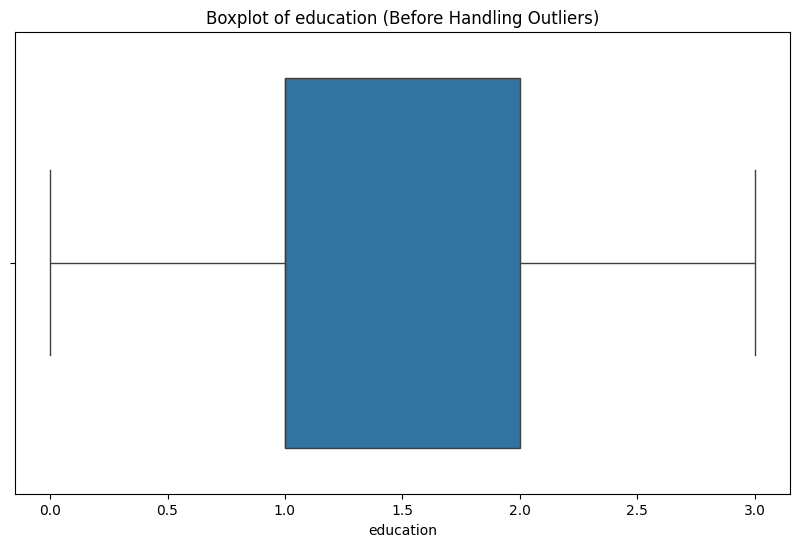

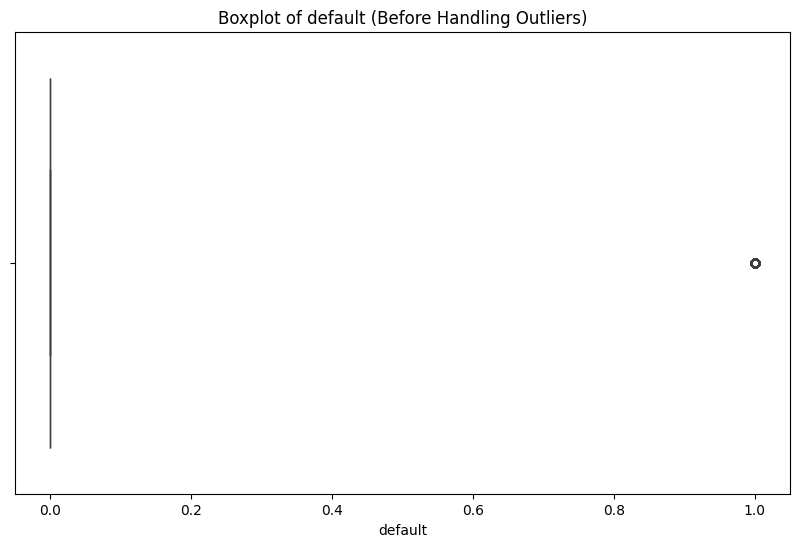

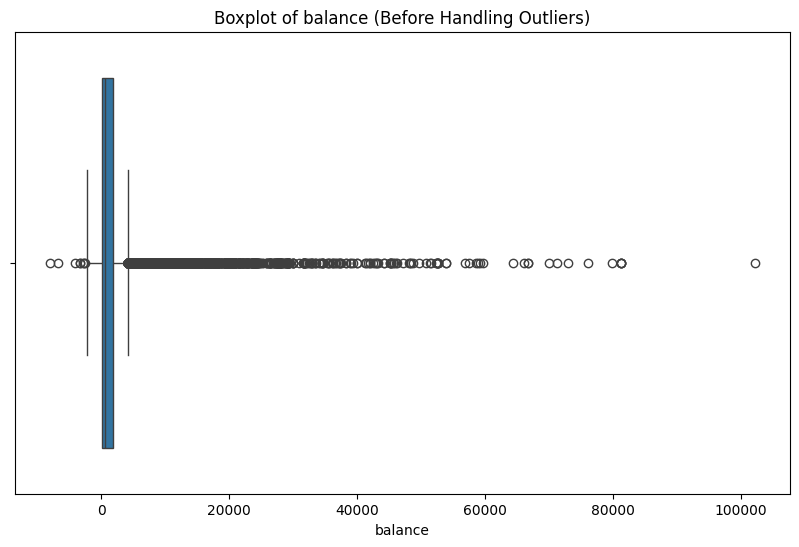

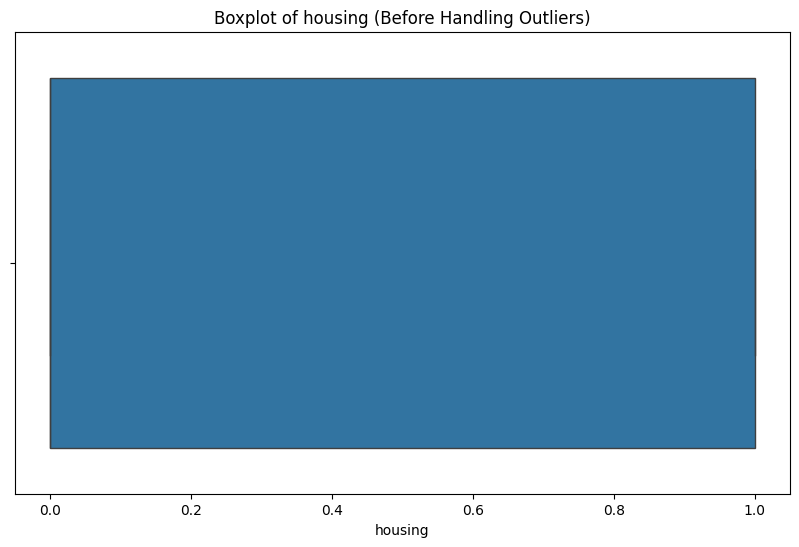

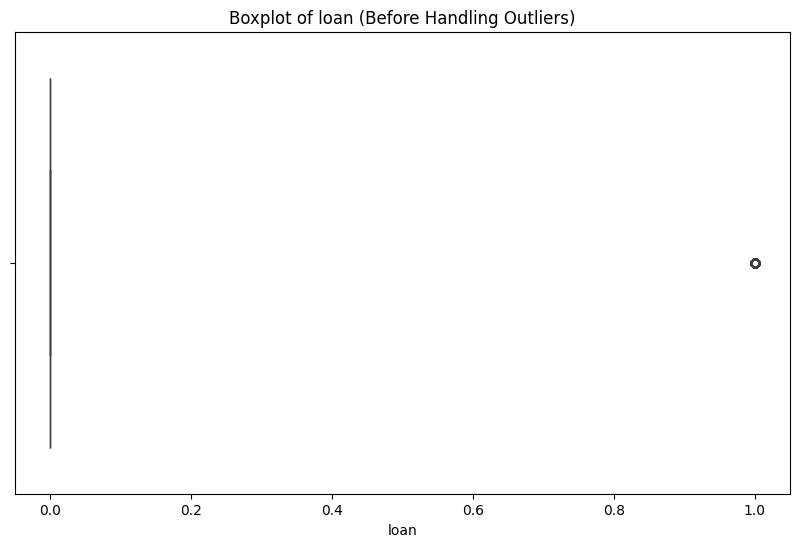

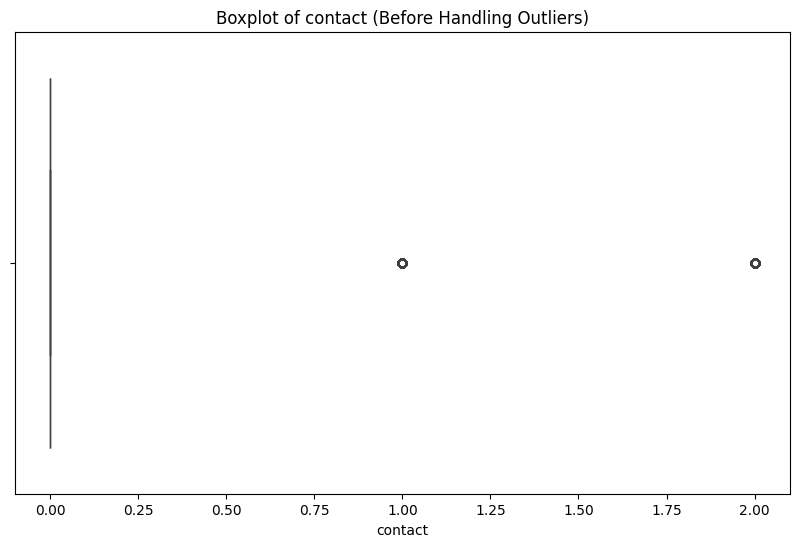

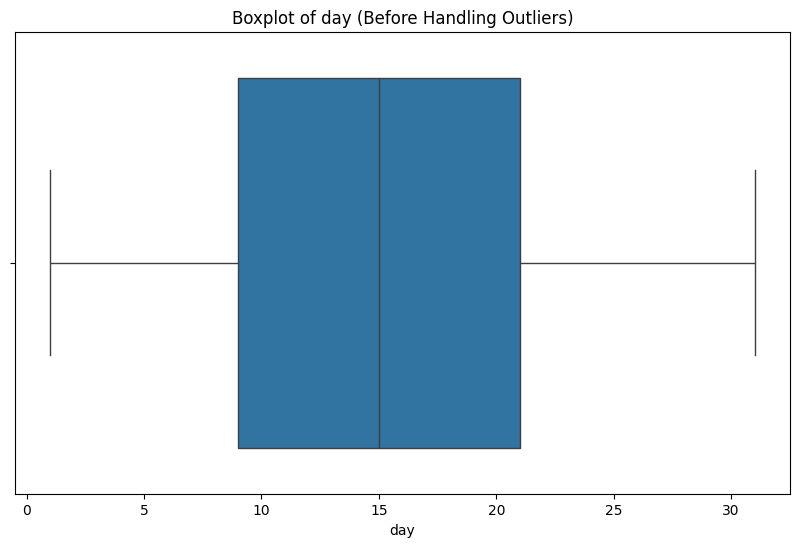

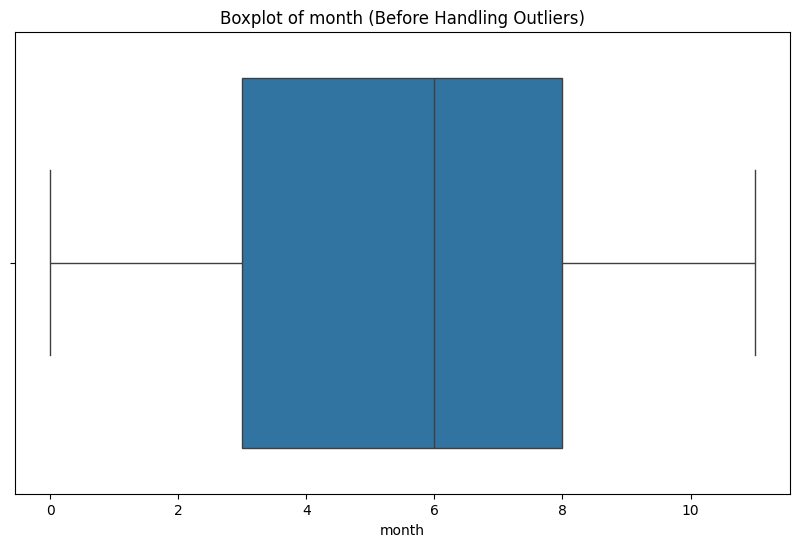

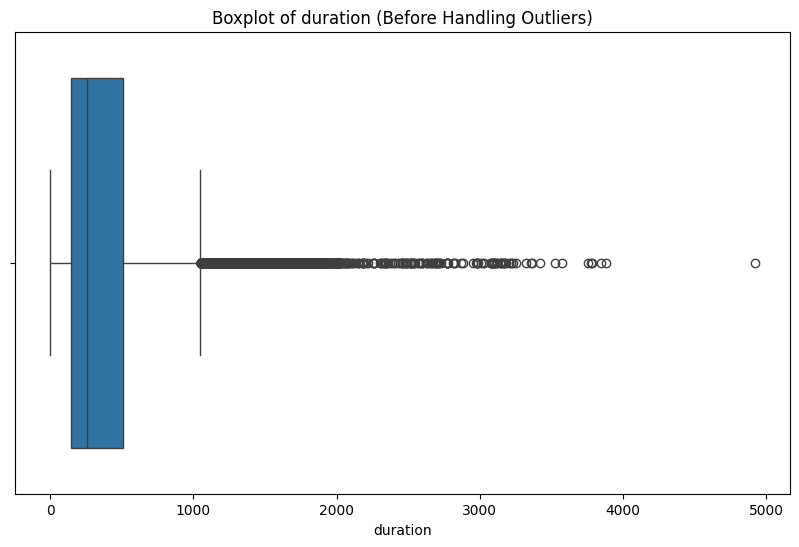

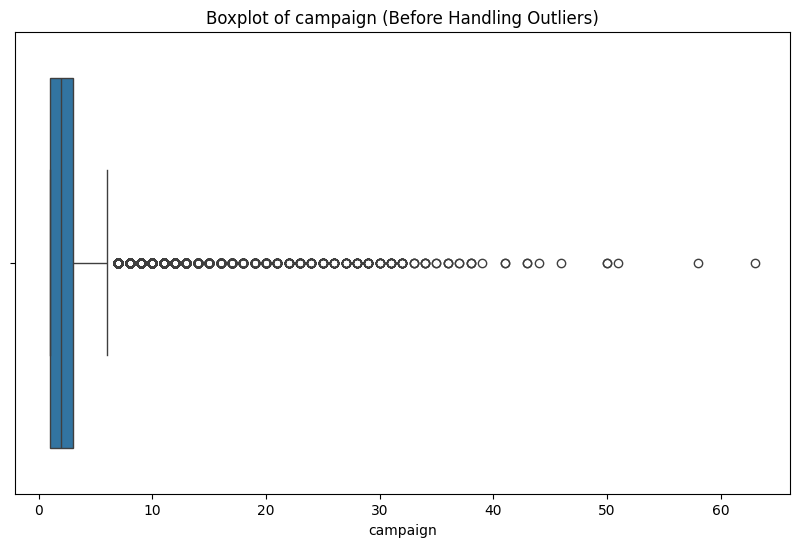

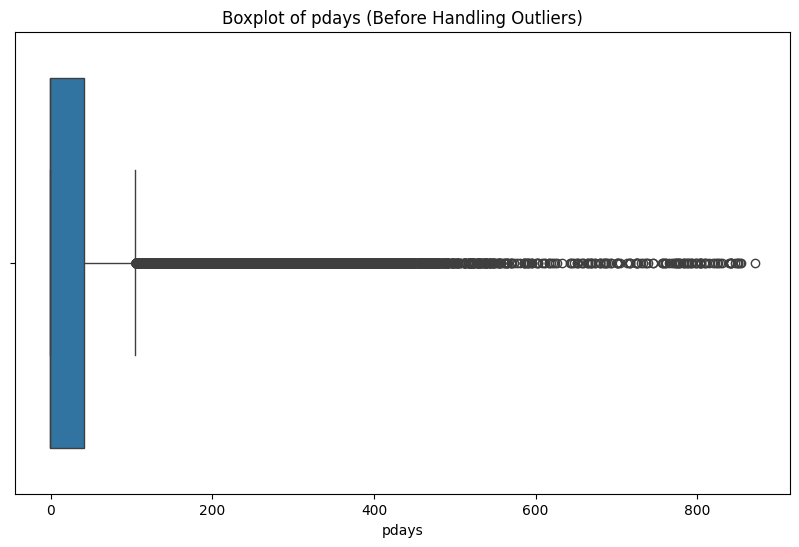

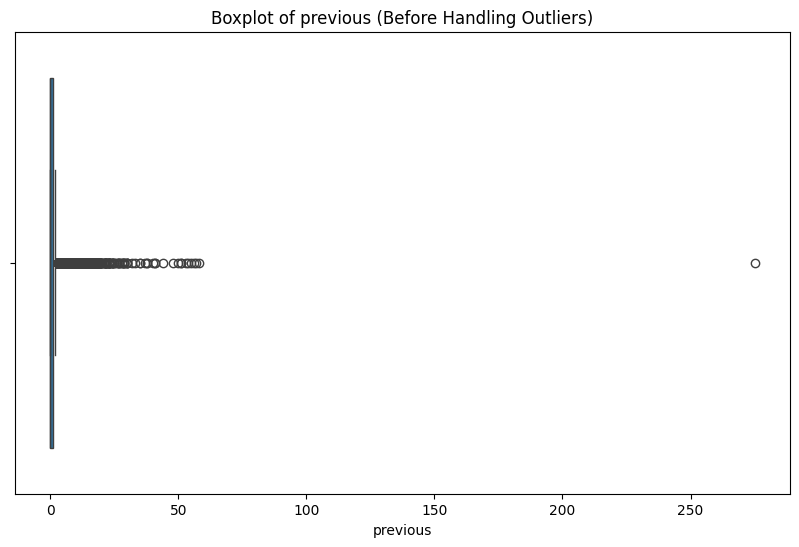

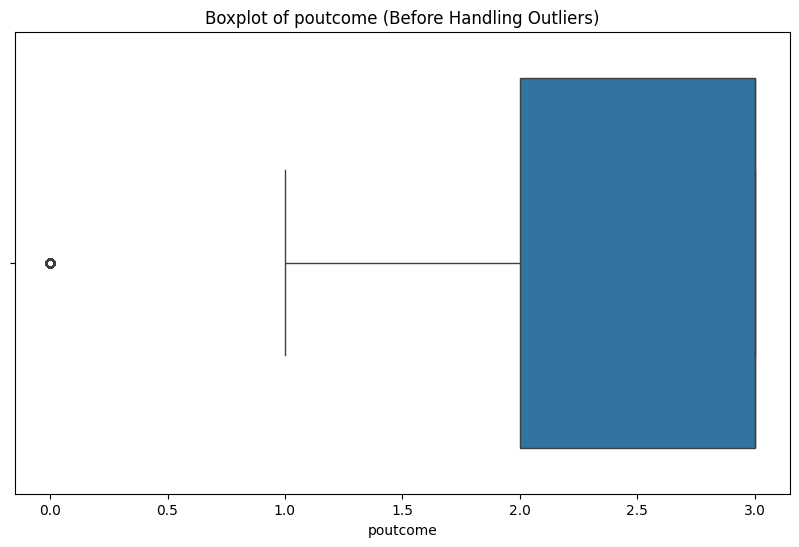


Identifying outliers:
- age: 633 outliers detected
- job: 0 outliers detected
- marital: 23621 outliers detected
- education: 0 outliers detected
- default: 688 outliers detected
- balance: 6059 outliers detected
- housing: 0 outliers detected
- loan: 6155 outliers detected
- contact: 15906 outliers detected
- day: 0 outliers detected
- month: 0 outliers detected
- duration: 3548 outliers detected
- campaign: 2938 outliers detected
- pdays: 11623 outliers detected
- previous: 6527 outliers detected
- poutcome: 7258 outliers detected

Handling outliers (capping and flooring):
- age: Outliers handled by capping and flooring.
- job: Outliers handled by capping and flooring.
- marital: Outliers handled by capping and flooring.
- education: Outliers handled by capping and flooring.
- default: Outliers handled by capping and flooring.
- balance: Outliers handled by capping and flooring.
- housing: Outliers handled by capping and flooring.
- loan: Outliers handled by capping and flooring.
- 

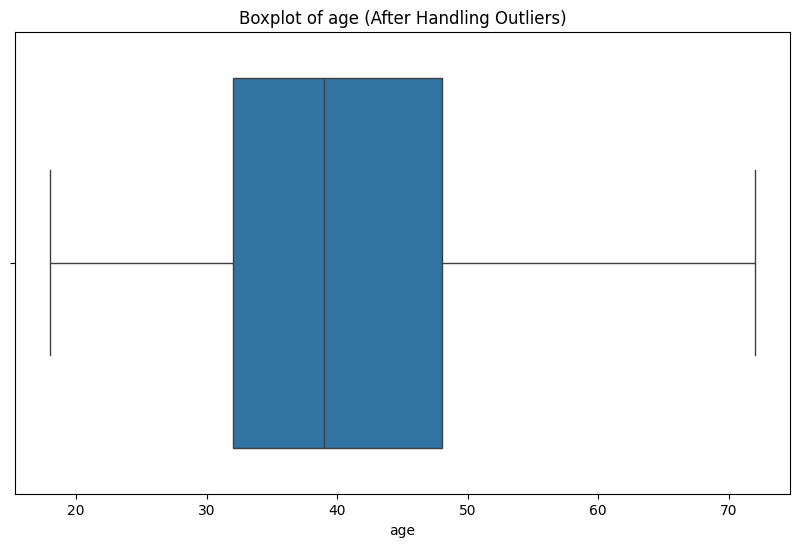

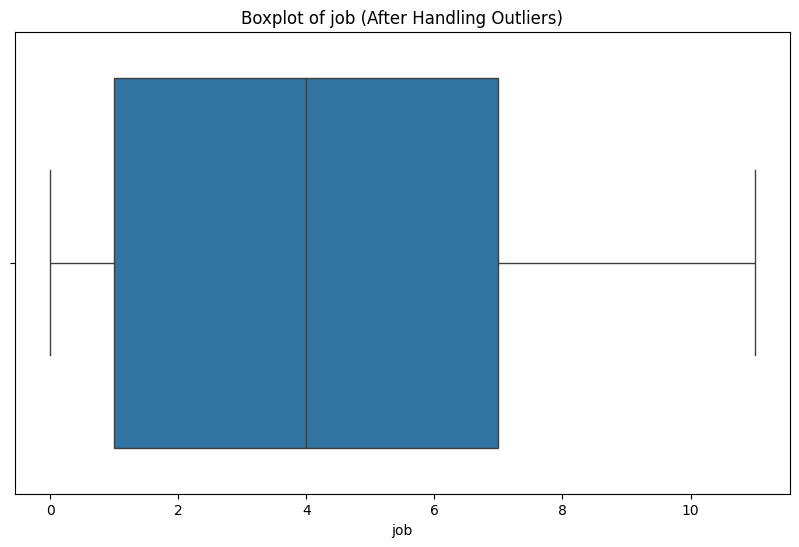

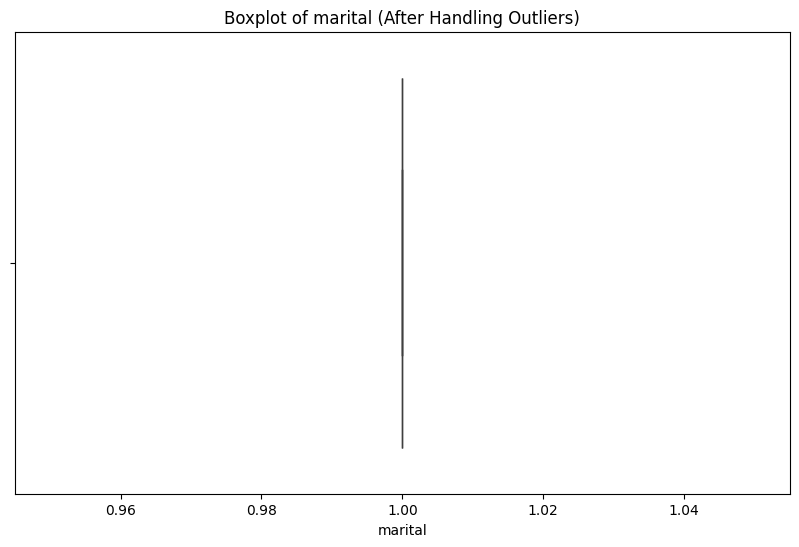

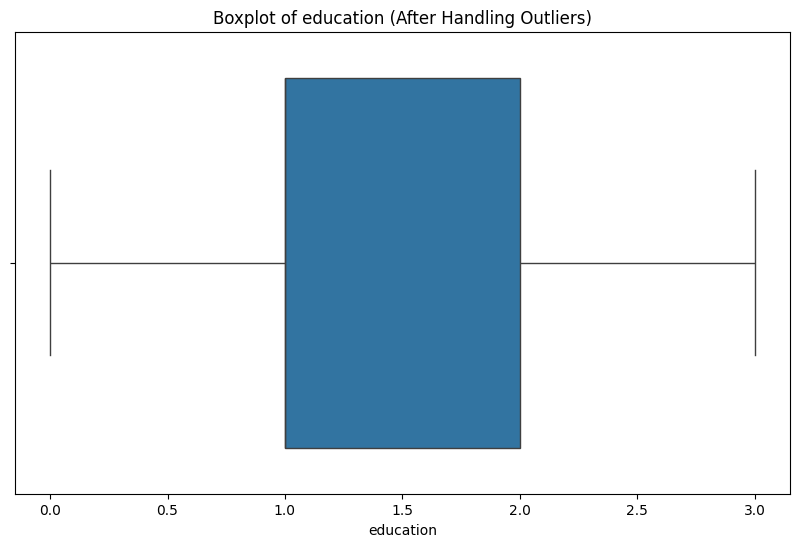

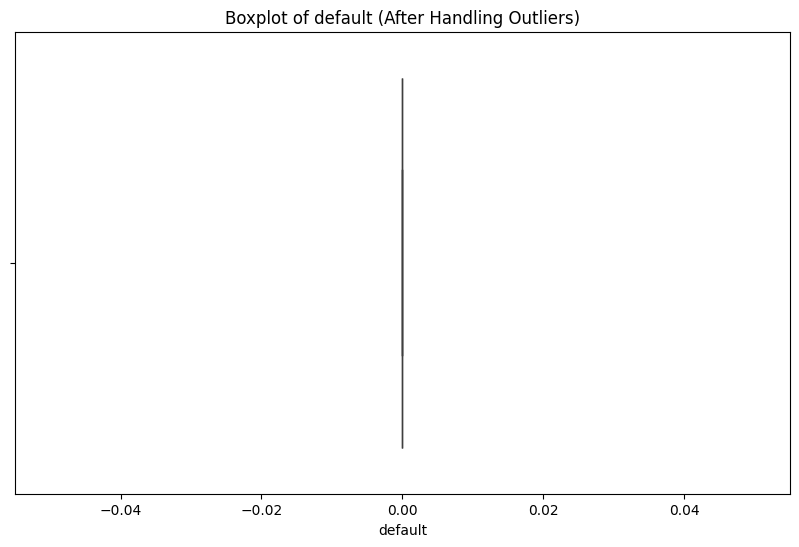

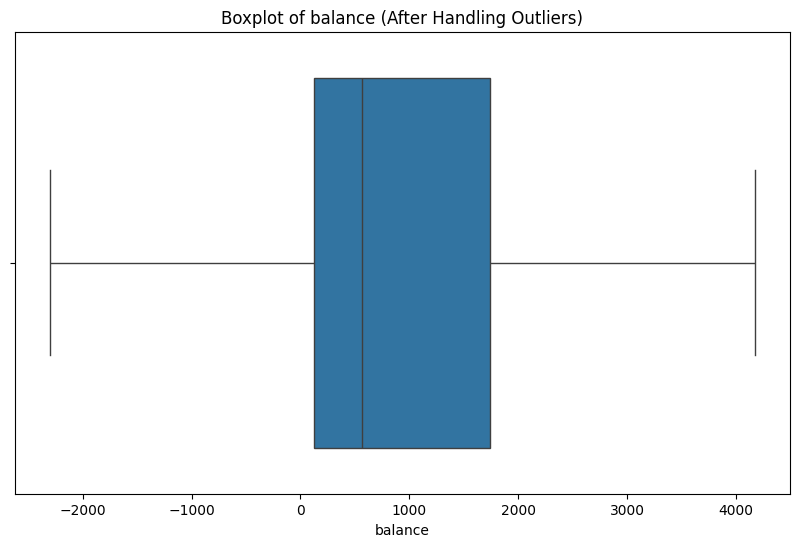

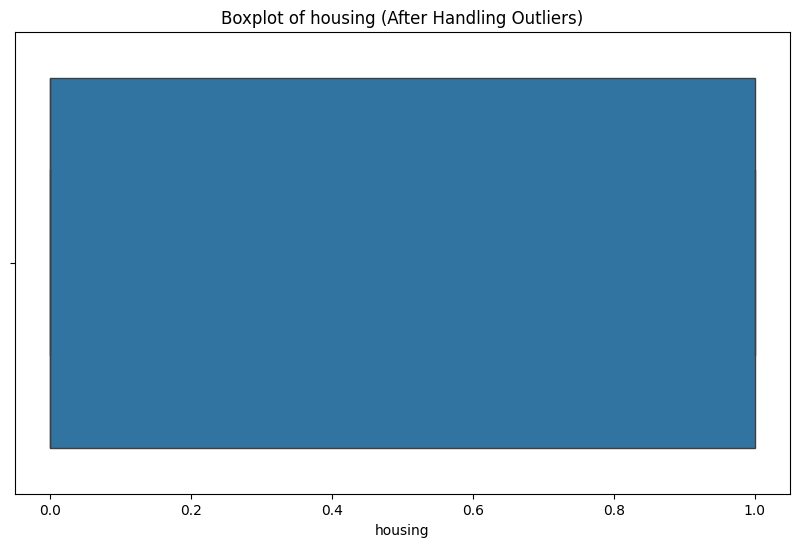

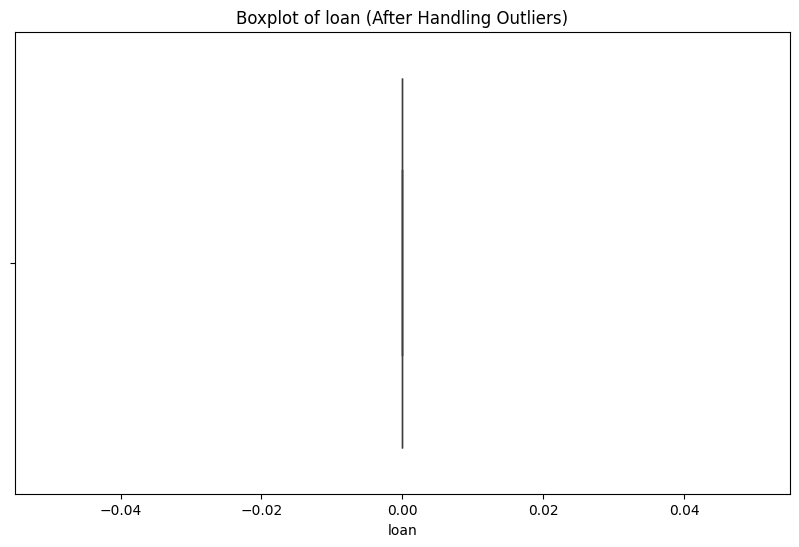

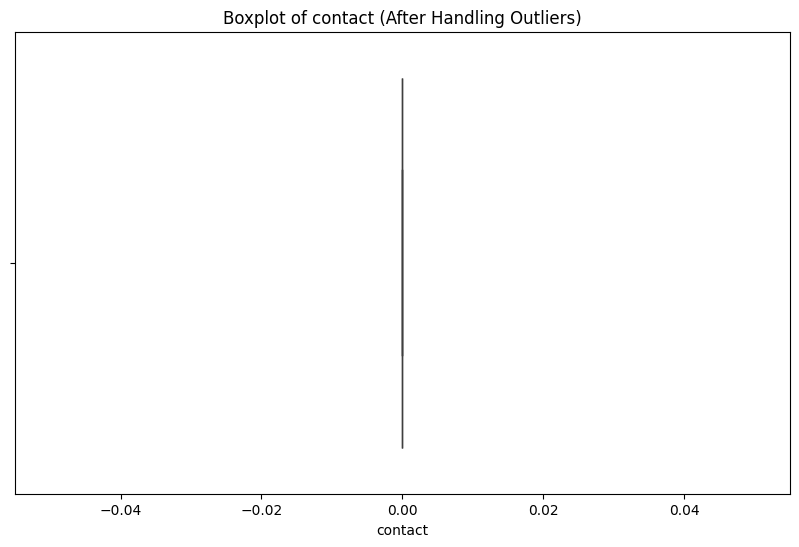

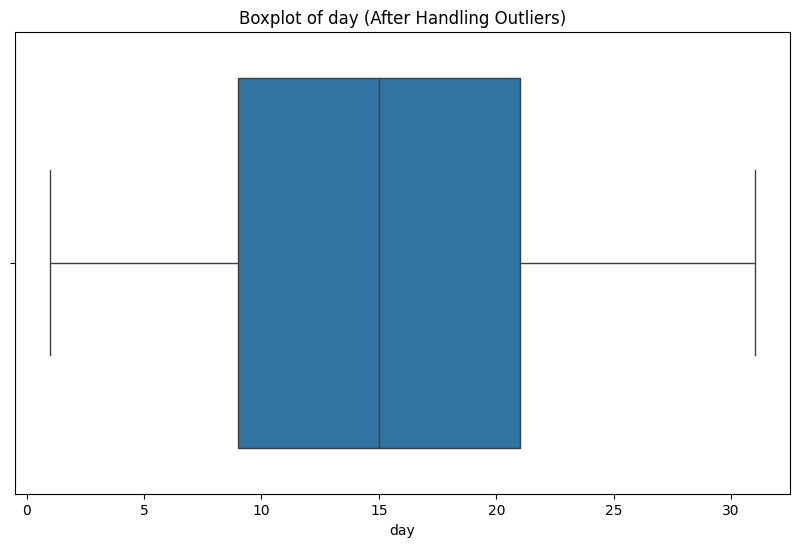

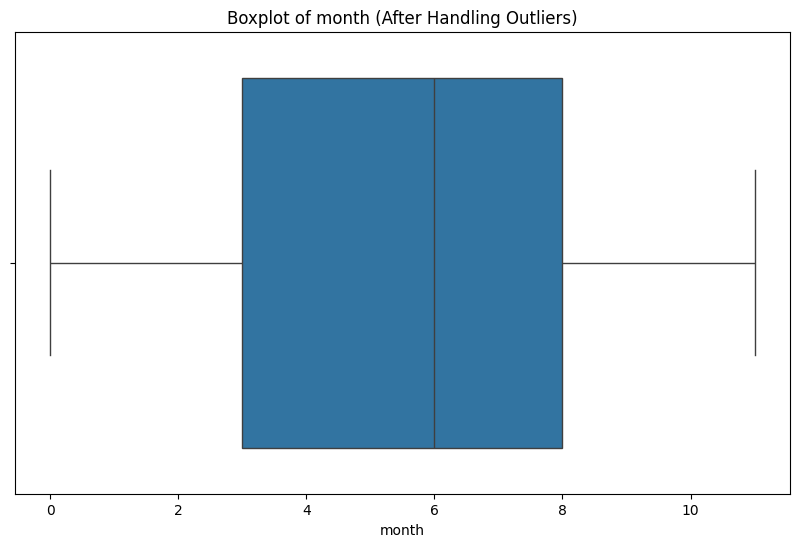

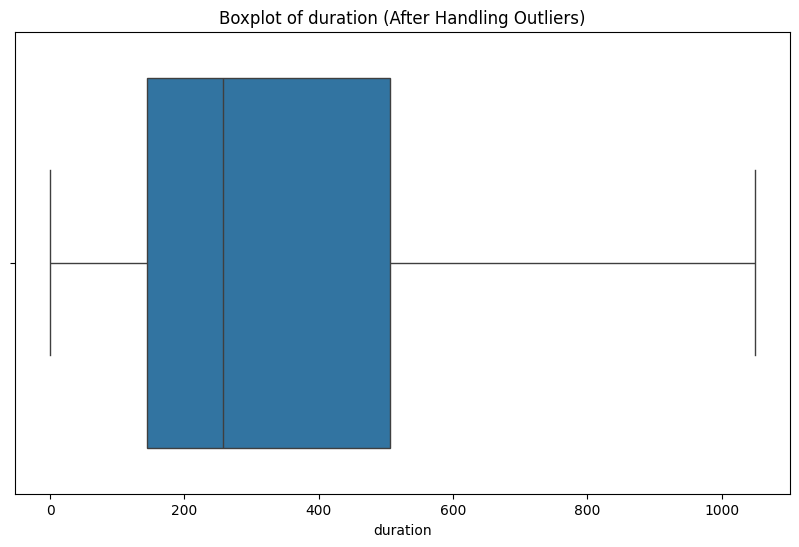

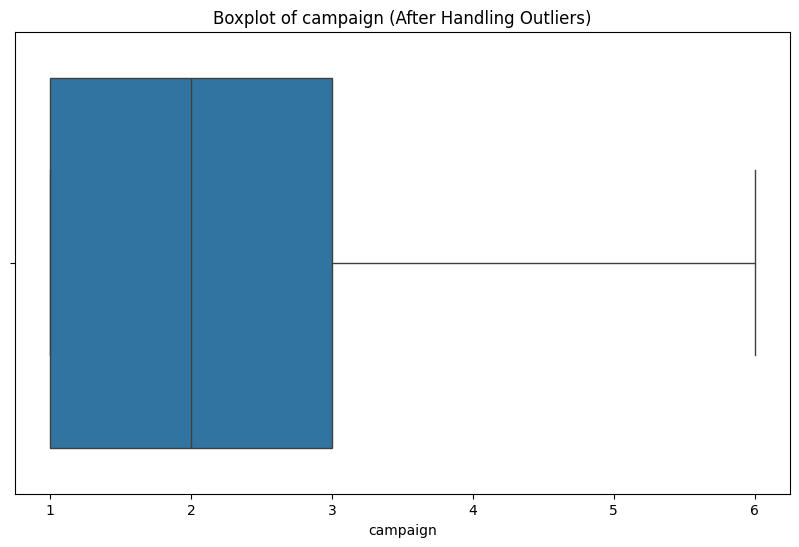

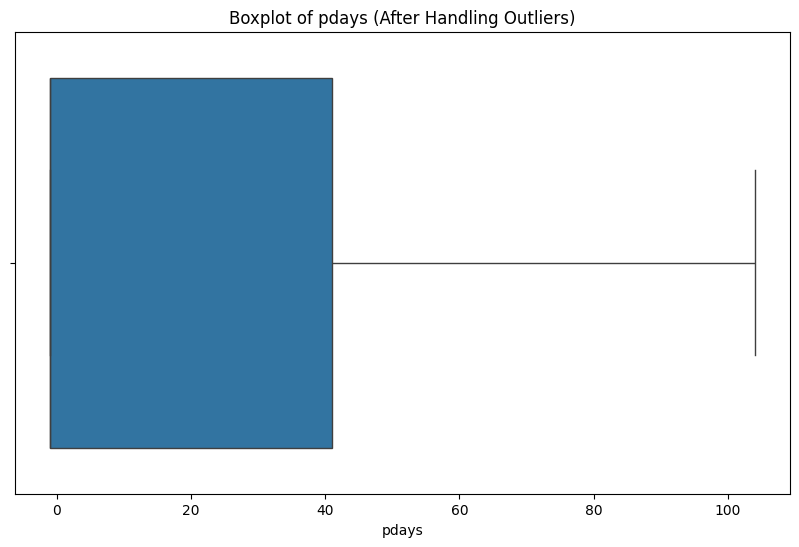

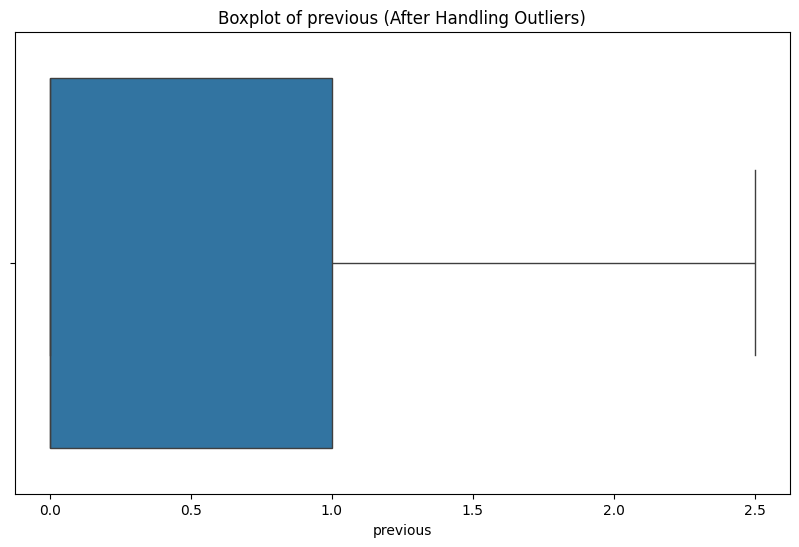

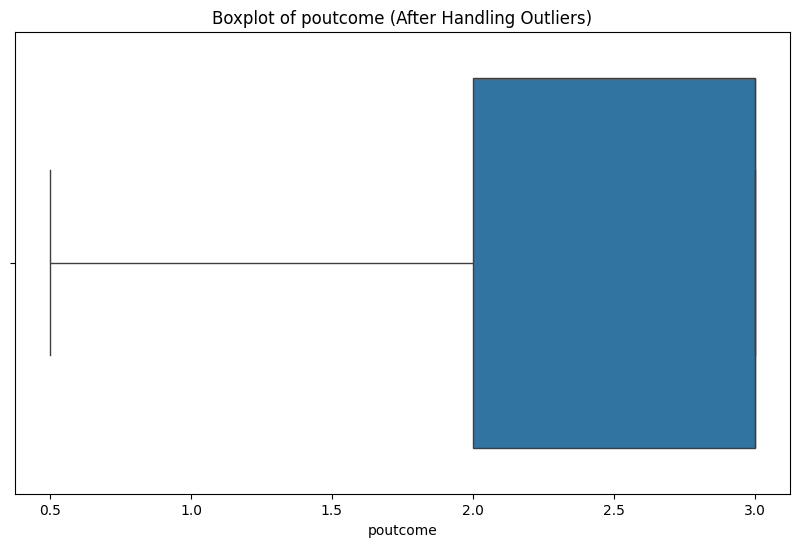


Outliers handled and dataset scaled.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Visualize Outliers using Box Plots
print("Visualizing outliers with box plots:")
numerical_columns = X_train.columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot of {column} (Before Handling Outliers)")
    plt.show()

# 2. Identify Outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

print("\nIdentifying outliers:")
for column in numerical_columns:
    outliers = detect_outliers_iqr(X_train, column)
    print(f"- {column}: {len(outliers)} outliers detected")

# 3. Handling Outliers (Capping/Flooring)
print("\nHandling outliers (capping and flooring):")
for column in numerical_columns:
    Q1 = np.percentile(X_train[column], 25)
    Q3 = np.percentile(X_train[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[column] = np.where(X_train[column] < lower_bound, lower_bound, X_train[column])
    X_train[column] = np.where(X_train[column] > upper_bound, upper_bound, X_train[column])
    print(f"- {column}: Outliers handled by capping and flooring.")

# 4. Re-visualize Outliers After Handling
print("\nVisualizing outliers after handling:")
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot of {column} (After Handling Outliers)")
    plt.show()

# 5. Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nOutliers handled and dataset scaled.")



# **Feature Engineering**

In [28]:
# Example of feature selection using mutual information
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature selection
print("Performing feature selection using mutual information...")
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Retrieve the selected feature indices
selected_features = selector.get_support(indices=True)

# Print selected features and their importance scores
print("\nSelected Features (indices):", selected_features)
print("Feature scores:")
for idx, score in zip(selected_features, selector.scores_[selected_features]):
    print(f"- Feature {idx}: {score:.4f}")

# Dataset dimensions after feature selection
print("\nDataset dimensions after feature selection:")
print(f"- X_train shape: {X_train.shape}")
print(f"- X_test shape: {X_test.shape}")



Performing feature selection using mutual information...

Selected Features (indices): [ 1  5  6  9 10 11 12 13 14 15]
Feature scores:
- Feature 1: 0.0602
- Feature 5: 0.0268
- Feature 6: 0.0873
- Feature 9: 0.0241
- Feature 10: 0.0840
- Feature 11: 0.1726
- Feature 12: 0.0287
- Feature 13: 0.0434
- Feature 14: 0.0263
- Feature 15: 0.0549

Dataset dimensions after feature selection:
- X_train shape: (63874, 10)
- X_test shape: (9043, 10)


**Dimensionality Reduction**

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Adjust based on explained variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# **Model** **Training**

In [30]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.826274466438129
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7985
           1       0.34      0.52      0.41      1058

    accuracy                           0.83      9043
   macro avg       0.64      0.69      0.65      9043
weighted avg       0.86      0.83      0.84      9043

Confusion Matrix for Random Forest:
 [[6925 1060]
 [ 511  547]]


In [31]:
# Import necessary libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7107 - loss: 2.3140 - val_accuracy: 0.5200 - val_loss: 1.5308
Epoch 2/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7231 - loss: 0.9931 - val_accuracy: 0.5210 - val_loss: 1.7169
Epoch 3/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7250 - loss: 0.8857 - val_accuracy: 0.6106 - val_loss: 1.9170
Epoch 4/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7384 - loss: 0.7362 - val_accuracy: 0.5721 - val_loss: 1.0894
Epoch 5/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7354 - loss: 0.7309 - val_accuracy: 0.5515 - val_loss: 0.9184
Epoch 6/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7449 - loss: 0.6129 - val_accuracy: 0.4585 - val_loss: 0.9125
Epoch 7/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7522 - loss: 0.6188 - val_accuracy: 0.6393 - val_loss: 0.7352
Epoch 8/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7546 - loss: 0.5544 - val_accura

# **Evaluation**

In [32]:
# Neural Network Evaluation
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix for Neural Network:\n", confusion_matrix(y_test, y_pred_nn))

# Random Forest Evaluation (already provided in your code above)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Accuracy: 0.7875704965166427
Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      7985
           1       0.30      0.60      0.40      1058

    accuracy                           0.79      9043
   macro avg       0.62      0.70      0.63      9043
weighted avg       0.86      0.79      0.82      9043

Confusion Matrix for Neural Network:
 [[6492 1493]
 [ 428  630]]
Random Forest Accuracy: 0.826274466438129
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7985
           1       0.34      0.52      0.41      1058

    accuracy                           0.83      9043
   macro avg       0.64      0.69      0.65      9043
weighted avg       0.86      0.83      0.84      9043

Confusion Matrix for Random Forest:
 [[6925 1060]
 [ 511  547]]


In [33]:
# Evaluate on training data
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))

# Evaluate on test data (already computed)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Training Accuracy: 0.9999843441775996
Random Forest Test Accuracy: 0.826274466438129


**Feature selection**

In [34]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using the trained Random Forest model
selector = SelectFromModel(rf_model, threshold="mean")  # Select features above mean importance
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Number of features after selection:", X_train_selected.shape[1])

# Retrain the Random Forest model with selected features
rf_model_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fs.fit(X_train_selected, y_train)

# Evaluate on training data
y_pred_rf_train_fs = rf_model_fs.predict(X_train_selected)
print("Random Forest Training Accuracy after Feature Selection:", accuracy_score(y_train, y_pred_rf_train_fs))

# Evaluate on test data
y_pred_rf_fs = rf_model_fs.predict(X_test_selected)
print("Random Forest Test Accuracy after Feature Selection:", accuracy_score(y_test, y_pred_rf_fs))


Number of features after selection: 2
Random Forest Training Accuracy after Feature Selection: 0.9999060650655979
Random Forest Test Accuracy after Feature Selection: 0.7969700320690036


**Simplify The Model**

In [35]:
# Simplified Random Forest model
rf_model_simple = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit the maximum depth of the trees
    max_features='sqrt',  # Consider a subset of features at each split
    min_samples_split=10,  # Require a minimum of 10 samples to split
    min_samples_leaf=5,  # Require a minimum of 5 samples in a leaf
    random_state=42
)

rf_model_simple.fit(X_train_selected, y_train)

# Evaluate on training data
y_pred_rf_train_simple = rf_model_simple.predict(X_train_selected)
print("Simplified Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_simple))

# Evaluate on test data
y_pred_rf_simple = rf_model_simple.predict(X_test_selected)
print("Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_simple))


Simplified Random Forest Training Accuracy: 0.7983686633058834
Simplified Random Forest Test Accuracy: 0.8169855136569723


**Cross**- **Validation** **for** **evaluation**

In [36]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the simplified Random Forest model
cv_scores = cross_val_score(rf_model_simple, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.78575342 0.78630137 0.78567515 0.78403131 0.78604979]
Mean Cross-Validation Accuracy: 0.785562208215869


**Save the best model**

In [37]:
import joblib

# Save the simplified Random Forest model
joblib.dump(rf_model_simple, 'simplified_random_forest_model.pkl')


['simplified_random_forest_model.pkl']

In [38]:
# Load the saved model
rf_model_loaded = joblib.load('simplified_random_forest_model.pkl')

# Make predictions with the loaded model
y_pred_rf_loaded = rf_model_loaded.predict(X_test_selected)
print("Loaded Model Test Accuracy:", accuracy_score(y_test, y_pred_rf_loaded))


Loaded Model Test Accuracy: 0.8169855136569723


**Comparison**

In [39]:
# Evaluate on training data for the feature-selected model
y_pred_rf_train_fs = rf_model_fs.predict(X_train_selected)
print("Feature-Selected Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_fs))

# Evaluate on test data for the feature-selected model
y_pred_rf_fs = rf_model_fs.predict(X_test_selected)
print("Feature-Selected Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_fs))


# Evaluate on training data for the simplified model
y_pred_rf_train_simple = rf_model_simple.predict(X_train_selected)
print("Simplified Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_simple))

# Evaluate on test data for the simplified model
y_pred_rf_simple = rf_model_simple.predict(X_test_selected)
print("Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_simple))


Feature-Selected Random Forest Training Accuracy: 0.9999060650655979
Feature-Selected Random Forest Test Accuracy: 0.7969700320690036
Simplified Random Forest Training Accuracy: 0.7983686633058834
Simplified Random Forest Test Accuracy: 0.8169855136569723


In [40]:
# Save Random Forest model
import joblib
# Save Neural Network model
model_nn.save('neural_network_model.h5')

## Loading Models

In [41]:
# Load Random Forest model
rf_model_loaded = joblib.load('simplified_random_forest_model.pkl')

# Load Neural Network model
from keras.models import load_model
model_nn_loaded = load_model('neural_network_model.h5')


# PCA for Model Prediction

In [46]:
# Apply PCA transformation to both X_train and X_test using the same PCA instance
pca = PCA(n_components=2)  # Set n_components to 2, as X_train_selected has 2 features
X_train_transformed = pca.fit_transform(X_train_selected)
X_test_transformed = pca.transform(X_test_selected)  # Transform test data

# Random Forest predictions (after transforming X_test to match training data features)
y_pred_rf_loaded = rf_model_loaded.predict(X_test_transformed)
print("Loaded Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_loaded))

# Neural Network predictions
y_pred_nn_loaded = (model_nn_loaded.predict(X_test) > 0.5).astype("int32")
print("Loaded Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_loaded))


Loaded Random Forest Accuracy: 0.8169855136569723
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loaded Neural Network Accuracy: 0.7875704965166427


In [ ]:
# Random Forest predictions for the simplified model
y_pred_rf_loaded_simple = rf_model_loaded.predict(X_test_selected)
print("Loaded Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_loaded_simple))

# Neural Network predictions
y_pred_nn_loaded = (model_nn_loaded.predict(X_test) > 0.5).astype("int32")
print("Loaded Neural Network Test Accuracy:", accuracy_score(y_test, y_pred_nn_loaded))


Loaded Simplified Random Forest Test Accuracy: 0.7994028530354971
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loaded Neural Network Test Accuracy: 0.8585646356297689


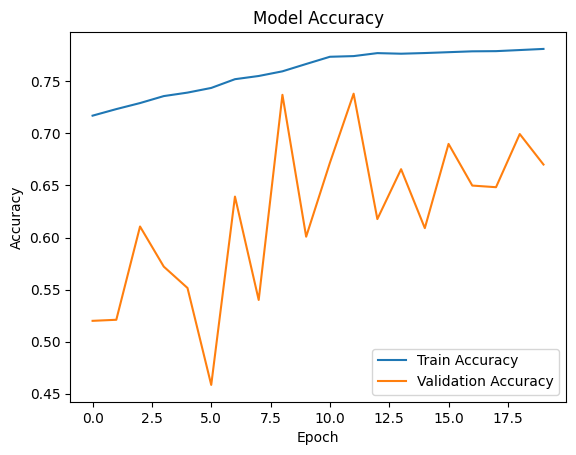

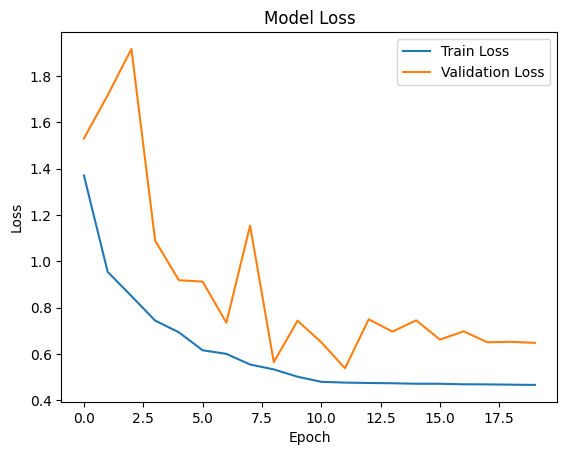

In [47]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
